# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [3]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning 

In [4]:
#checking if their is any null value or not
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.describe()
data.drop(['region'] , axis=1 , inplace=True)
#Dropping region as it would'nt have a strong correalation with charges parameter

In [14]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [15]:
""""
Sex has 2 values Male and Female so that we can replace it with 0 or 1
which means Removing Smoker column keeping male or female column as 1 or 0
"""
Male = pd.get_dummies(data['sex'] )
"""
We are keeping Female parameter which value is 0 then it is male else female
"""
Female = Male.drop(['male'], axis = 1)


In [16]:
# Male = pd.get_dummies(data['sex'] , drop_first=True)
#Concating gender data to main dataset
data = pd.concat([data , Female] , axis=1)
data.head()

,age,sex,bmi,children,smoker,charges,female
0,19,female,27.900,0,yes,16884.92400,1
1,18,male,33.770,1,no,1725.55230,0
2,28,male,33.000,3,no,4449.46200,0
3,33,male,22.705,0,no,21984.47061,0
4,32,male,28.880,0,no,3866.85520,0


In [17]:
smoker = pd.get_dummies(data['smoker'] , drop_first=True)
data = pd.concat([data , smoker] , axis=1)


In [18]:
data = data.rename(columns={'yes' : 'Smoker'})
data.head()

,age,sex,bmi,children,smoker,charges,female,Smoker
0,19,female,27.900,0,yes,16884.92400,1,1
1,18,male,33.770,1,no,1725.55230,0,0
2,28,male,33.000,3,no,4449.46200,0,0
3,33,male,22.705,0,no,21984.47061,0,0
4,32,male,28.880,0,no,3866.85520,0,0


# Exploratory Analysis

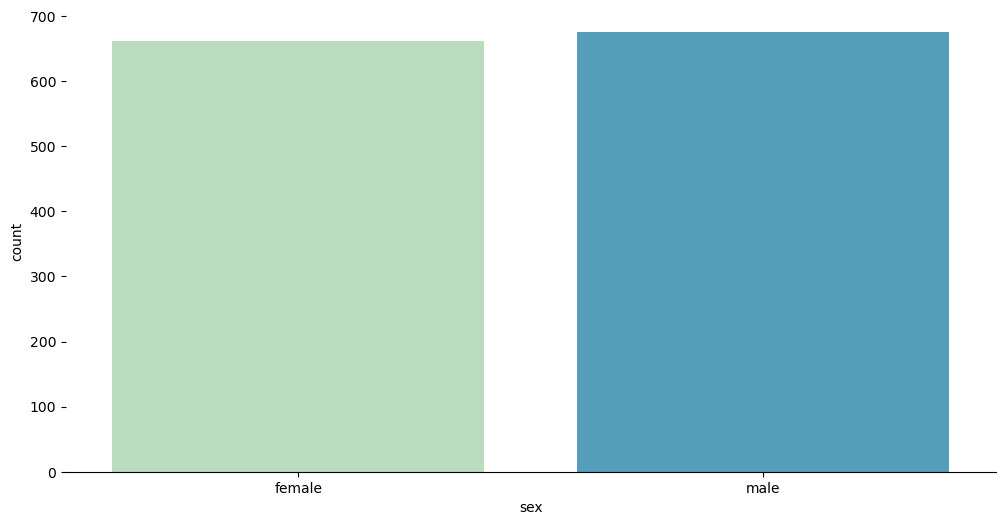

In [19]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'sex' , data = data , palette="GnBu")
sns.despine(left=True)

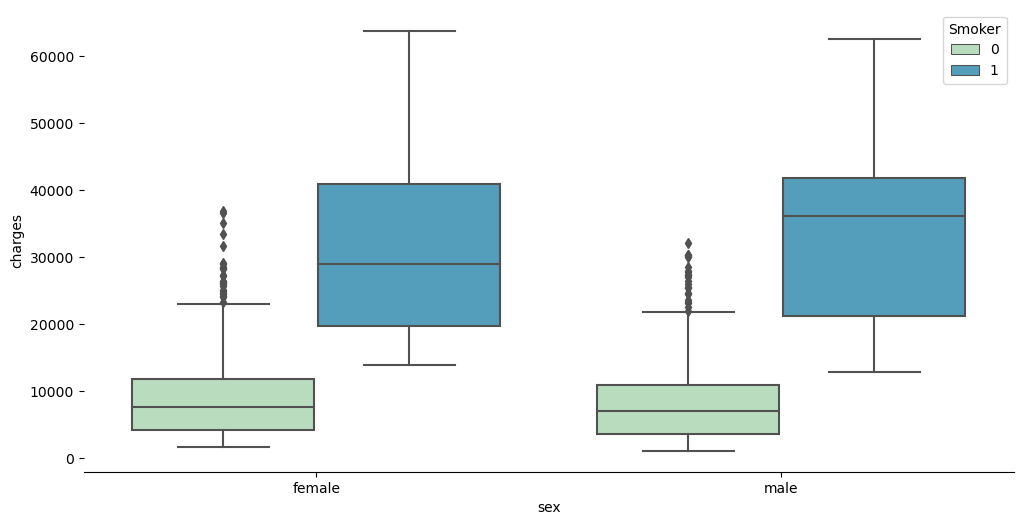

In [20]:
''''
Analysis charges based on sex and who who are smoker
'''
plt.figure(figsize = (12,6))
sns.boxplot(x = 'sex' ,y = 'charges', data = data , hue='Smoker', palette="GnBu")
sns.despine(left=True)

<Axes: xlabel='age', ylabel='charges'>

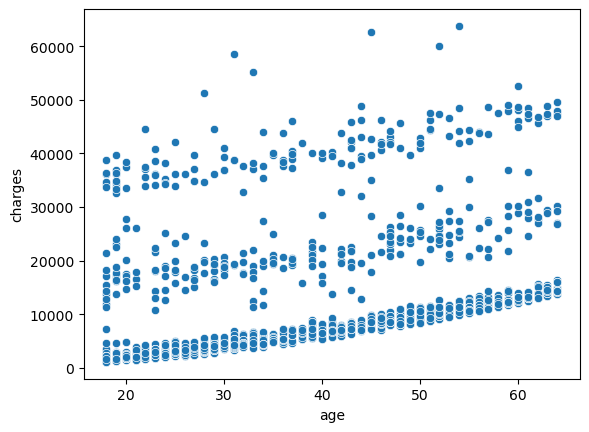

In [21]:
sns.scatterplot(x = "age" , y = "charges" ,data = data)

<Axes: xlabel='age', ylabel='charges'>

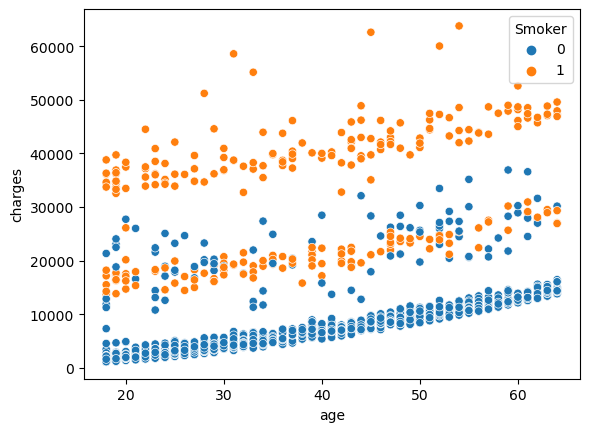

In [22]:
''''
We can clearly see here is with increasing age charges slightly increases
But people who are smoker have high charges
'''
sns.scatterplot(x = "age" , y = "charges" ,data = data , hue = "Smoker")

In [23]:
data.head()
data.drop(['sex','smoker'],axis=1,inplace=True)

In [24]:
data.head()

,age,bmi,children,charges,female,Smoker
0,19,27.900,0,16884.92400,1,1
1,18,33.770,1,1725.55230,0,0
2,28,33.000,3,4449.46200,0,0
3,33,22.705,0,21984.47061,0,0
4,32,28.880,0,3866.85520,0,0


In [25]:
data.corr()

,age,bmi,children,charges,female,Smoker
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.787251
female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-0.076185
Smoker,-0.025019,0.003750,0.007673,0.787251,-0.076185,1.000000


<Axes: >

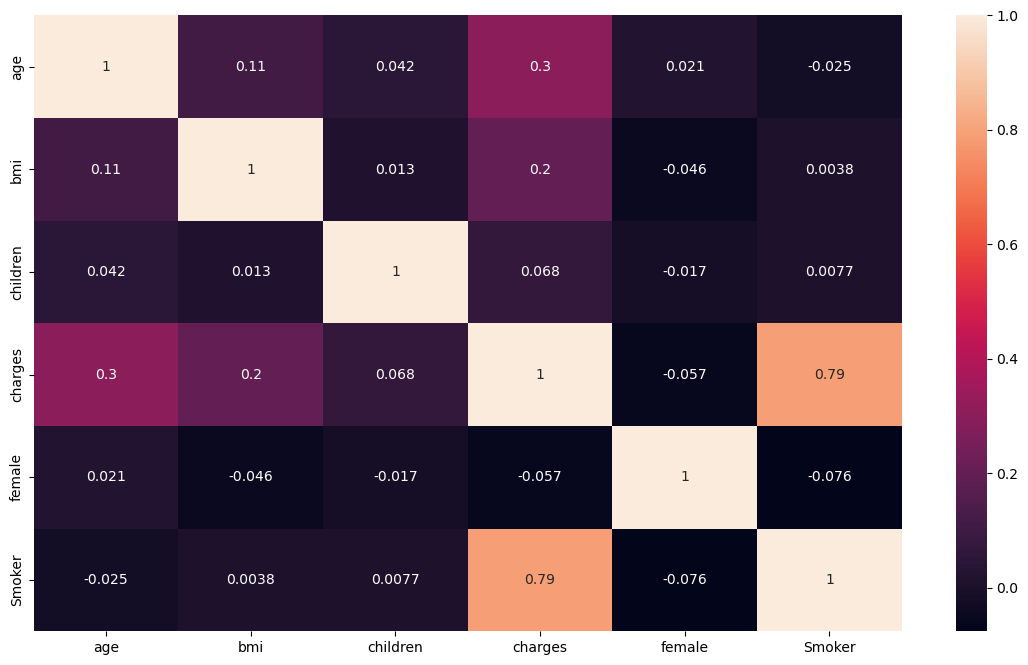

In [26]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr() , annot=True)

# Splitting the data

In [27]:
x = data.drop(['charges'] , axis=1)
y = data['charges']

In [28]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.4)

In [29]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(536,)

In [30]:
print(x_train['age'].mean())
print(x_train['age'].std())
x_train

39.254364089775564
13.856771792213364


,age,bmi,children,female,Smoker
944,62,39.930,0,0,0
535,38,28.025,1,0,0
777,45,39.805,0,0,0
959,48,36.670,1,0,0
1229,58,30.305,0,0,0
...,...,...,...,...,...
446,60,29.640,0,0,0
355,46,27.600,0,0,0
639,56,33.660,4,0,0
1280,48,33.330,0,1,0


# Scaling the data

(inputAge - meanOfAge)/std

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [33]:
scaled_x_train

array([[ 1.64250592,  1.45908959, -0.89595874, -0.98269338, -0.50116868],
       [-0.09058003, -0.47274553, -0.09309962, -0.98269338, -0.50116868],
       [ 0.41490337,  1.43880573, -0.89595874, -0.98269338, -0.50116868],
       ...,
       [ 1.20923443,  0.44165102,  2.31547773, -0.98269338, -0.50116868],
       [ 0.63153912,  0.38810162, -0.89595874,  1.01761142, -0.50116868],
       [ 0.5593272 , -0.17984654,  1.51261861, -0.98269338, -0.50116868]])

# Support Vector regression Model

SVM or  support Vector Machine. Basically we are doing is that for now directing import SVR from Sklearn lib
But what SVM does in the back?


So basically SVM is generally used for the data which is not easy to seperate linearly.The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible . So to make hyperPlane and seperarte the nonlinear data we use Kernels

Support vectors are the data points that are close to the decision boundary.A decision boundary is a line or surface that separates different regions in data space. It is used to make decisions about which class a new data point belongs to

In [45]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(x_train ,y_train)

SVR()

In [37]:
predict = regressor.predict(scaled_x_test)

C:\Users\ARYAN BHATT\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [38]:
predict.shape

(536,)

In [39]:
predict[:10]

array([9121.7354579 , 9119.54302373, 9122.92335305, 9125.28861968,
       9126.13463215, 9127.15030326, 9121.29663827, 9123.55183068,
       9123.74319089, 9122.51064542])

In [40]:
y_test[:10]

554     17878.90068
573     31620.00106
398     14988.43200
1095     4561.18850
1195    18838.70366
452      1969.61400
1071    13974.45555
273      9617.66245
339      8232.63880
392      8964.06055
Name: charges, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


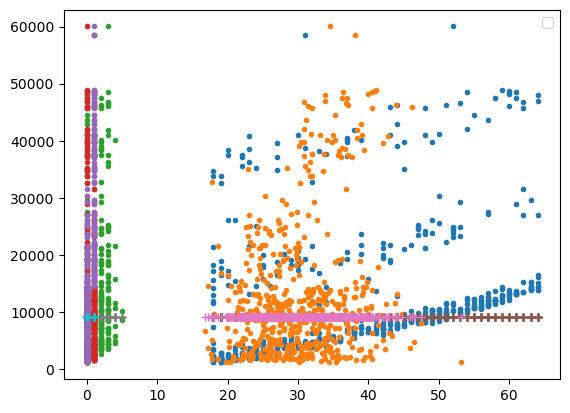

In [43]:
plt.plot(x_test,  y_test , "." )
plt.plot(x_test,  predict , "+" )

plt.legend()

plt.show()

### OLS Method to check models accuracy

In [46]:
import statsmodels.api as sm
x_with_const  = sm.add_constant(x_train)
x_with_const

,const,age,bmi,children,female,Smoker
944,1.0,62,39.930,0,0,0
535,1.0,38,28.025,1,0,0
777,1.0,45,39.805,0,0,0
959,1.0,48,36.670,1,0,0
1229,1.0,58,30.305,0,0,0
...,...,...,...,...,...,...
446,1.0,60,29.640,0,0,0
355,1.0,46,27.600,0,0,0
639,1.0,56,33.660,4,0,0
1280,1.0,48,33.330,0,1,0


In [47]:
model = sm.OLS(y_train , x_with_const)
result = model.fit()

In [48]:
print(result.summary())
print(result.params)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     442.3
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          6.44e-227
Time:                        18:02:12   Log-Likelihood:                -8152.7
No. Observations:                 802   AIC:                         1.632e+04
Df Residuals:                     796   BIC:                         1.635e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.19e+04   1295.861     -9.181      0.0

In [49]:
test =  np.array([27,30.153,1,0,0])
print(x_test.shape)
test = test.reshape(1,5)
test.shape

(536, 5)


(1, 5)

In [50]:
predict = regressor.predict(test)

C:\Users\ARYAN BHATT\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [51]:
print("The Person who is male is 27  years old has 1 children and does'nt smoke will have insurance approx : ",round(predict[0],2),"Rs")

The Person who is male is 27  years old has 1 children and does'nt smoke will have insurance approx :  9102.38 Rs
